# Multi-Class Image Classification with Transfer Learning

In this notebook, we'll build a multi-class image classifier using transfer learning with a pre-trained ResNet-50 model. The dataset consists of images belonging to multiple classes. We'll follow these steps:

1. **Data Preprocessing**: We'll preprocess the image data using a custom `ImageDataGenerator` to handle images with transparency.

2. **Model Selection and Architecture Design**: We'll load the pre-trained ResNet-50 model, freeze its layers, and add custom layers on top for classification.

3. **Model Training and Evaluation**: We'll compile the model, train it on the training data with validation on the validation data, and evaluate its performance on the test data.

4. **Fine-Tuning and Optimization**: We'll unfreeze some layers of the base model for fine-tuning, recompile the model with a lower learning rate, and retrain it.

5. **Performance Analysis and Visualization**: We'll analyze the training history by plotting accuracy and loss curves.

6. **Sample Predictions**: We'll visualize sample predictions on the test data.

7. **External Image Prediction**: We'll load an external image and predict its class using the trained model.

Let's get started!


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np



Data Preprocessing

In this section, we preprocess the image data using a custom ImageDataGenerator. We create data generators for training, validation, and testing. We also handle images with transparency by implementing a custom method in the MyImageDataGenerator class.

In [3]:


class MyImageDataGenerator(ImageDataGenerator):
    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = super()._get_batches_of_transformed_samples(index_array)
        for i, j in enumerate(index_array):
            img = Image.open(self.filepaths[j])
            if img.mode == 'P':  # Convert palette images with transparency to RGBA
                img = img.convert('RGBA')
            batch_x[i] = np.array(img) / 255.0
        return batch_x


In [4]:
# Paths to the directories
train_dir = 'Downloads/MultiClass_Images/train'
valid_dir = 'Downloads/MultiClass_Images/validation'
test_dir = 'Downloads/MultiClass_Images/test'


In [5]:
## Data Generators
# create data generators for training, validation, and testing.
train_datagen = MyImageDataGenerator(rescale=1./255)
valid_datagen = MyImageDataGenerator(rescale=1./255)
test_datagen = MyImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


Model Selection and Architecture Design

In this section, we load the pre-trained ResNet-50 model, freeze its layers, and add custom layers on top for classification. We compile the model specifying the optimizer, loss function, and evaluation metrics.

In [6]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the convolutional base


In [7]:
## Custom Layers
# Custom layers are added on top of the ResNet-50 base.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


In [8]:
## Full Model
# We create the full model by combining the base model with custom layers.

model = Model(inputs=base_model.input, outputs=predictions)


In [9]:
# Step 4: Model Training and Evaluation
## Model Compilation
# compile the model specifying optimizer, loss function, and evaluation metrics.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model Training and Evaluation

In this section, we train the model on the training data with validation on the validation data. We evaluate the model's performance on the test data.

In [10]:
## Model Training
# The model is trained on the training data with validation on the validation data.

history_befor= model.fit(train_generator, validation_data=validation_generator, epochs=15)


Epoch 1/15


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/98 ━━━━━━━━━━━━━━━━━━━━ 21:20 13s/step - accuracy: 0.0312 - loss: 3.7911

/opt/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.0483 - loss: 3.6997 - val_accuracy: 0.0798 - val_loss: 3.4033
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.0771 - loss: 3.4269 - val_accuracy: 0.0741 - val_loss: 3.3365
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.0788 - loss: 3.3703 - val_accuracy: 0.0969 - val_loss: 3.2486
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.1004 - loss: 3.3348 - val_accuracy: 0.1111 - val_loss: 3.1904
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.1150 - loss: 3.2615 - val_accuracy: 0.1197 - val_loss: 3.1382
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.1166 - loss: 3.2366 - val_accuracy: 0.1624 - val_loss: 3.0596
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - accuracy: 0.1346 - loss: 3.1692 - val_accuracy: 0.1083 - val_loss: 3.1835
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.1269 - loss: 3.1980 - val_accuracy: 0.1738 - val_loss: 2.

In [11]:
## Model Evaluation
# evaluate the trained model on the test data.
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2453 - loss: 2.6554
Test Accuracy: 24.51%


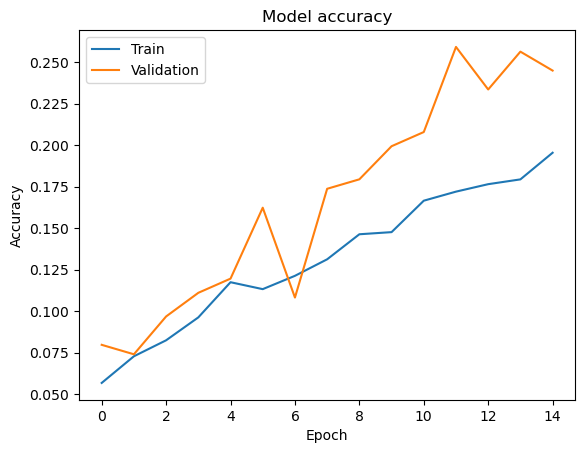

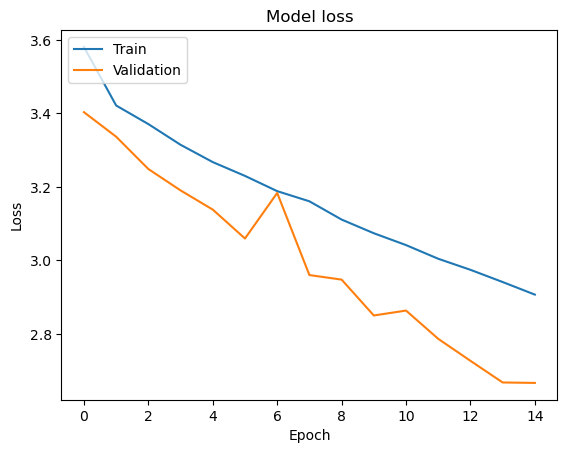

In [14]:
# Plot Training History
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history_befor.history['accuracy'])
plt.plot(history_befor.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_befor.history['loss'])
plt.plot(history_befor.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
model.save('multitwoclassifier.h5')

Fine-Tuning and Optimization

In this section, we unfreeze some layers of the base model for fine-tuning, recompile the model with a lower learning rate, and retrain it.

In [13]:
# Step 5: Fine-Tuning and Optimization
## Unfreezing Layers
#  unfreeze some layers of the base model for fine-tuning.

# Unfreeze some layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Retrain the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=14)

Epoch 1/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.0774 - loss: 7.5876 - val_accuracy: 0.1197 - val_loss: 3.9011
Epoch 2/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1941 - loss: 2.8728 - val_accuracy: 0.0684 - val_loss: 4.1564
Epoch 3/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.2644 - loss: 2.5929 - val_accuracy: 0.1453 - val_loss: 3.2981
Epoch 4/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.3487 - loss: 2.2954 - val_accuracy: 0.3618 - val_loss: 2.2841
Epoch 5/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.4075 - loss: 2.0930 - val_accuracy: 0.5584 - val_loss: 1.6858
Epoch 6/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.4782 - loss: 1.8848 - val_accuracy: 0.6752 - val_loss: 1.3628
Epoch 7/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.5393 - loss: 1.6859 - val_accuracy: 0.7322 - val_loss: 1.1795
Epoch 8/14
98/98 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6000 - loss: 1.4811 - val_accuracy: 0.8006 - v

In [14]:

### 3. Evaluate the Fine-Tuned Model

loss, accuracy = model.evaluate(test_generator)
print(f'Fine-Tuned Test Accuracy: {accuracy * 100:.2f}%')



12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9315 - loss: 0.4295
Fine-Tuned Test Accuracy: 93.04%


Performance Analysis and Visualization

In this section, we analyze the training history by plotting accuracy and loss curves.



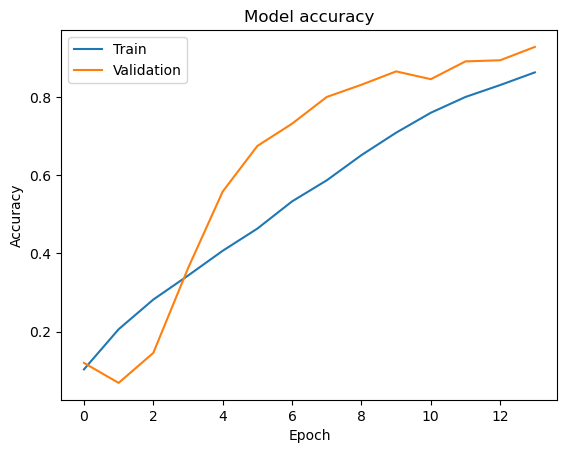

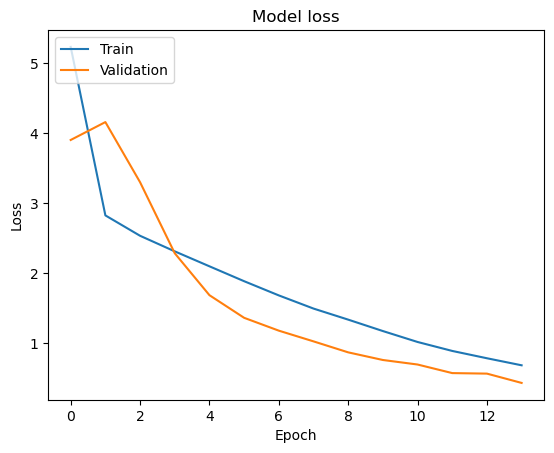

In [16]:
# Step 6: Performance Analysis and Visualization
## Training History
# We plot the training and validation accuracy and loss curves.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
# Save the fine-tuned model
model.save('fine_tuned_multiclass_classifier.h5')


Sample Predictions

In this section, we visualize sample predictions on the test data.



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


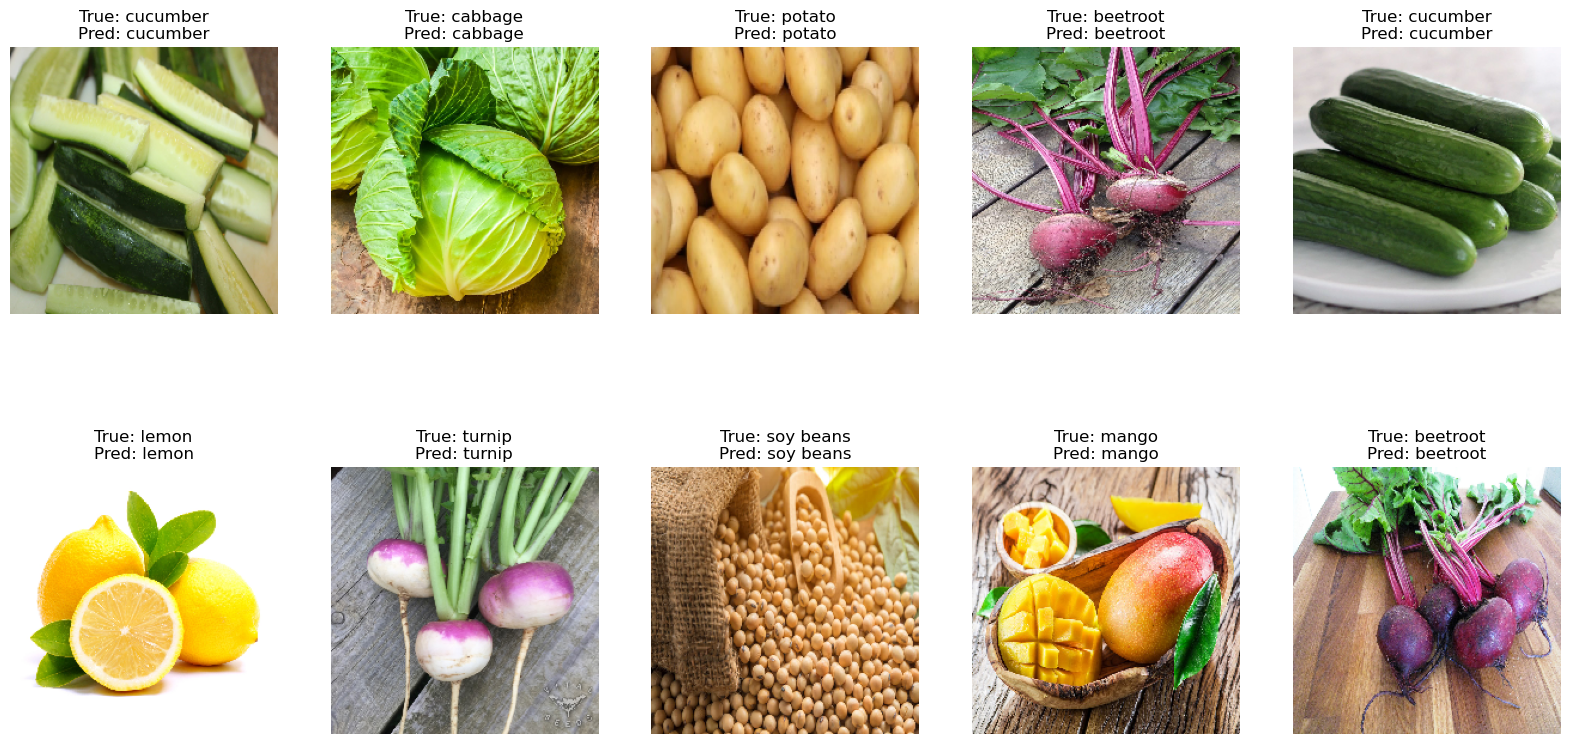

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_predictions(generator, model, num_samples=10):
    # Get a batch of images and labels
    images, labels = next(generator)
    predictions = model.predict(images)

    # Convert predictions and labels to class names
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    class_labels = list(generator.class_indices.keys())
    
    # Plot the images with predictions
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}')
        plt.axis('off')
    plt.show()

# Plot sample predictions
plot_sample_predictions(test_generator, model, num_samples=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted label: carrot


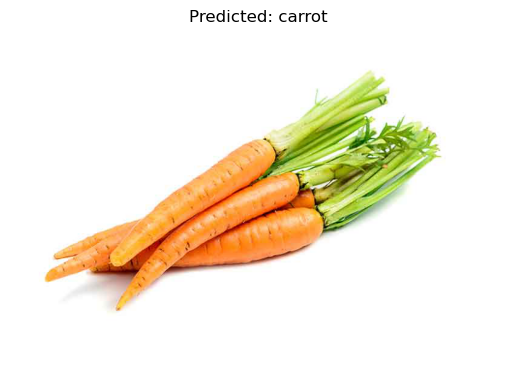

In [71]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    
    # If the image has an alpha channel (transparency), convert it to RGB
    if img.mode == 'P':
        img = img.convert('RGBA')
    elif img.mode == 'RGBA':
        img = img.convert('RGB')
    
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image_class(image_path, model, class_labels):
    image_array = load_and_preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    
    return predicted_label

# Path to the external image
image_path = 'Downloads/MultiClass_Images/image/carrot.jpg'

# Get class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Predict the class of the external image
predicted_label = predict_image_class(image_path, model, class_labels)

print(f'Predicted label: {predicted_label}')

# Visualize the image with its predicted label
img = Image.open(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()
